### Saildrone - 1030 PostDeployment March 31

**Observations**

- see notes beyond issues addressed here

- Latitude = 37.781094
  Longitude = -122.305265

Data format really wants something more refined than a pandas csv read but with a lot of delimiters specified, it works... its not speedy though

In [16]:
import os
import glob #python >= 3.5

import datetime
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


In [17]:
### specify primary bulk figure parameters
fontsize = 20
labelsize = 16
#plotstyle = 'seaborn'
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 1
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 1
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

In [18]:
root_path = '/Users/bell/in_and_outbox/Ongoing_Analysis/ITAE_Projects/SPN1/2019_SailDrone_RadsIntercomparison/1030 PostDeployment Comparison/RAD TEST 3_30_2019/'


In [310]:
swdata = {}
for filename in sorted(glob.iglob(root_path+'/*SW*.csv', recursive=True), reverse=True):
    print(filename)
    swdata.update({filename.split('/')[-1]: pd.read_csv(filename,header=None,
                                                        sep='"|,|SW Rn', engine='python',
                                                        usecols=[0,2],names=['time','sw'],
                                                        parse_dates=True,index_col='time')})
    print(swdata[filename.split('/')[-1]].index[0],swdata[filename.split('/')[-1]].index[-1])


/Users/bell/in_and_outbox/Ongoing_Analysis/ITAE_Projects/SPN1/2019_SailDrone_RadsIntercomparison/1030 PostDeployment Comparison/RAD TEST 3_30_2019/SW1905_20190331013522.csv
2019-03-31 01:35:24 2019-03-31 05:56:30


In [248]:
#swdata['SW1905_20190331013522.csv'].index=swdata['SW1905_20190331013522.csv'].index.tz_localize('Etc/GMT-7')
#swdata['SW1905_20190331013522.csv'].index=swdata['SW1905_20190331013522.csv'].index.tz_convert('UTC')


In [191]:
lwdata = {}
for filename in sorted(glob.iglob(root_path+'/*LW*.csv', recursive=True), reverse=True):
    print(filename)
    lwdata.update({filename.split('/')[-1]: pd.read_csv(filename,header=None,
                                                        sep='"|,|Rd|D|C|LW Rn', engine='python',
                                                        usecols=[0,2,4,6,8],names=['time','lwnet','c1','c2','lw'],
                                                        parse_dates=True,index_col='time')})

/Users/bell/in_and_outbox/Ongoing_Analysis/ITAE_Projects/SPN1/2019_SailDrone_RadsIntercomparison/1030 PostDeployment Comparison/RAD TEST 3_30_2019/LW1903_20190331.csv
/Users/bell/in_and_outbox/Ongoing_Analysis/ITAE_Projects/SPN1/2019_SailDrone_RadsIntercomparison/1030 PostDeployment Comparison/RAD TEST 3_30_2019/LW1902_20190331.csv


In [311]:
spn1 = {}
for filename in sorted(glob.iglob(root_path+'/*A*.csv', recursive=True), reverse=True):
    print(filename)
    spn1.update({filename.split('/')[-1]: pd.read_csv(filename,delimiter=',F|,|\t', engine='python', header=None,
                                                      names=['time','total','diffuse','sun','c0','c1','c2','c3',
                                                                                  'c4','c5','c6','c7','temp','something',''],
                                                      error_bad_lines=False,
                                                      parse_dates=True,index_col='time')})
    print(spn1[filename.split('/')[-1]].index[0],spn1[filename.split('/')[-1]].index[-1])

/Users/bell/in_and_outbox/Ongoing_Analysis/ITAE_Projects/SPN1/2019_SailDrone_RadsIntercomparison/1030 PostDeployment Comparison/RAD TEST 3_30_2019/SPN1_A1916_20190331.csv
2019-03-31 01:26:12 2019-03-31 05:57:07
/Users/bell/in_and_outbox/Ongoing_Analysis/ITAE_Projects/SPN1/2019_SailDrone_RadsIntercomparison/1030 PostDeployment Comparison/RAD TEST 3_30_2019/SPN1_A1915_20190331.csv
2019-03-31 01:25:13 2019-03-31 02:56:23
/Users/bell/in_and_outbox/Ongoing_Analysis/ITAE_Projects/SPN1/2019_SailDrone_RadsIntercomparison/1030 PostDeployment Comparison/RAD TEST 3_30_2019/SPN1_A1914_20190331.csv
2019-03-31 02:36:49 2019-03-31 05:56:50
/Users/bell/in_and_outbox/Ongoing_Analysis/ITAE_Projects/SPN1/2019_SailDrone_RadsIntercomparison/1030 PostDeployment Comparison/RAD TEST 3_30_2019/SPN1_A1913_20190331.csv
2019-03-31 01:25:44 2019-03-31 05:57:04
/Users/bell/in_and_outbox/Ongoing_Analysis/ITAE_Projects/SPN1/2019_SailDrone_RadsIntercomparison/1030 PostDeployment Comparison/RAD TEST 3_30_2019/SPN1_A159

In [58]:
from pysolar.solar import *
import datetime

### example below
from dateutil import tz

solar_hypothetical = pd.DataFrame(columns=('Datetime', 'deg', 'rad','irr'))

for i in range(60*24):

    date = datetime.datetime(2019, 3, 30, 12, tzinfo=datetime.timezone.utc) + datetime.timedelta(minutes=i - 1)
    altitude_deg = get_altitude(37.781094, -122.305265, date)
    rad = radiation.get_radiation_direct(date, altitude_deg)
    irr = rad*np.cos(np.deg2rad(90-altitude_deg))
    solar_hypothetical.loc[i] = [date,altitude_deg,rad,irr]

solar_hypothetical = solar_hypothetical.set_index('Datetime')


In [312]:
for unit, value in spn1.items():
    count=0
    value['sza'] = np.nan
    try:
        value = value.tz_localize('UTC')
    except:
        value = value.tz_convert('UTC')
    spn1[unit] = value

for unit, value in swdata.items():
    count=0
    value['sza'] = np.nan
    try:
        value = value.tz_localize('UTC')
    except:
        value = value.tz_convert('UTC')
    swdata[unit] = value
    

solar_hypothetical['sza'] = np.nan
try:
    solar_hypothetical = solar_hypothetical.tz_localize('UTC')
except:
    solar_hypothetical = solar_hypothetical.tz_convert('UTC')


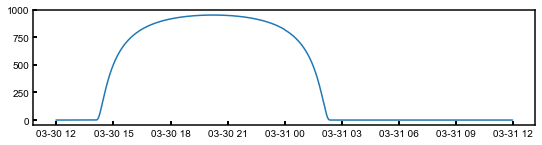

In [60]:
fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

plt.plot(solar_hypothetical.rad)

### Plot Timeseries of Each Instrument including temperatures

(737148.5416666666, 737149.1666666666)

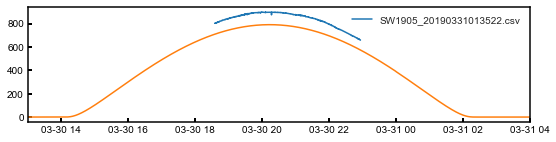

In [75]:
fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for unit, value in swdata.items():
    plt.plot(value.index+datetime.timedelta(hours=0),value.sw,label=unit)

plt.legend()

plt.plot(solar_hypothetical.irr)
ax1.set_xlim(['2019-03-30 13:00','2019-03-31 04:00'])

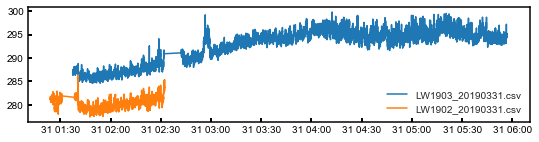

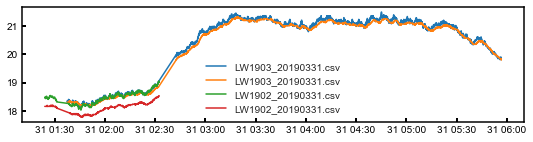

In [83]:
fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for unit, value in lwdata.items():
    plt.plot(value.lw,label=unit)

plt.legend()

fig = plt.figure(2,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for unit, value in lwdata.items():
    plt.plot(value.c1,label=unit)
    plt.plot(value.c2,label=unit)

plt.legend()



### Difference Plots

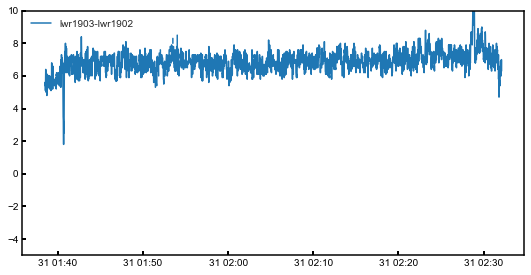

In [56]:
fig = plt.figure(1,figsize=(9,4.5))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

plt.plot(lwdata['LW1903_20190331.csv'].lw-lwdata['LW1902_20190331.csv'].lw,label='lwr1903-lwr1902')
ax1.set_ylim([-5,10])
plt.legend()

In [57]:
tmp = (lwdata['LW1903_20190331.csv'].lw-lwdata['LW1902_20190331.csv'].lw)
print("blue \n median:{} w/m^2 \n std:{} w/m^2".format(tmp.median(),tmp.std()))


blue 
 median:6.899999999999977 w/m^2 
 std:0.6370091106724493 w/m^2


### One-One Plots

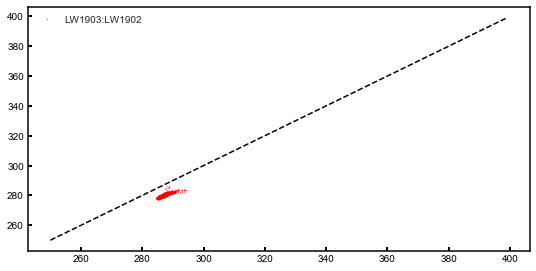

In [65]:
fig = plt.figure(1,figsize=(9,4.5))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

t1 = '2019-03-31 01:40:00'
t2 = '2019-03-31 02:30:00'
plt.plot(lwdata['LW1903_20190331.csv'][t1:t2]['lw'].resample('1s').mean(),
         lwdata['LW1902_20190331.csv'][t1:t2]['lw'].resample('1s').mean(),
         '.r',markersize=.5,
         label='LW1903:LW1902')
plt.plot(range(250,400),range(250,400),'k--')
plt.legend()


Text(0, 0.5, 'SPN1')

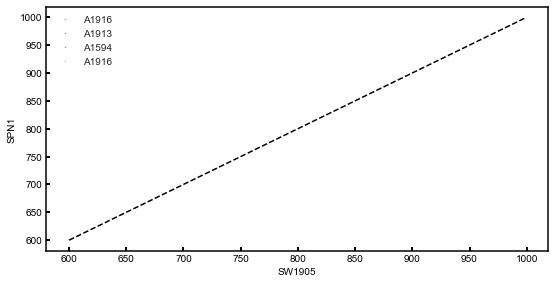

In [315]:
fig = plt.figure(1,figsize=(9,4.5))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

t1 = '2019-03-30 18:50:00'
t2 = '2019-03-30 22:30:00'
t3 = '2019-03-30 19:55:00'
t1tz = '2019-03-31 01:50:00'
t2tz = '2019-03-31 05:30:00'
t3tz = '2019-03-31 02:55:00'
plt.plot(swdata['SW1905_20190331013522.csv'][t1:t2]['sw'].resample('1s').mean()[:-2],
         spn1['SPN1_A1916_20190331.csv'][t1:t2]['total'].resample('1s').mean(),
         '.r',markersize=.5,
         label='A1916')
plt.plot(swdata['SW1905_20190331013522.csv'][t1:t2]['sw'].resample('1s').mean()[:-1],
         spn1['SPN1_A1913_20190331.csv'][t1:t2]['total'].resample('1s').mean(),
         '.b',markersize=.5,
         label='A1913')
plt.plot(swdata['SW1905_20190331013522.csv'][t1:t2]['sw'].resample('1s').mean(),
         spn1['SPN1_A1594_20190331.csv'][t1:t2]['total'].resample('1s').mean(),
         '.g',markersize=.5,
         label='A1594')

plt.plot(swdata['SW1905_20190331013522.csv'][t1:t3]['sw'].resample('1s').mean()[:-1],
         spn1['SPN1_A1915_20190331.csv'][t1:t3]['total'].resample('1s').mean(),
         '.c',markersize=.5,
         label='A1916')

plt.plot(range(600,1000),range(600,1000),'k--')
plt.legend()
plt.xlabel('SW1905')
plt.ylabel('SPN1')


### Calculate SZA as this is more comparable paramter than irradiance

In [77]:
### alameda, ca
lat = 37.781094
lon = -122.305265


In [313]:
for unit, value in swdata.items():
    count=0
    value['sza'] = np.nan
 
    for index, row in value.iterrows():
        value['sza'][index] = get_altitude(lat, lon, index)
        if (count % 3600) == 0:
            print(row)
        count+=1
        
    swdata[unit] = value

sw     802.112000
sza     10.061054
Name: 2019-03-31 01:35:24+00:00, dtype: float64
sw     882.582000
sza     -1.853371
Name: 2019-03-31 02:35:23+00:00, dtype: float64
sw     893.367000
sza    -13.460893
Name: 2019-03-31 03:35:23+00:00, dtype: float64
sw     841.103000
sza    -24.482776
Name: 2019-03-31 04:35:23+00:00, dtype: float64
sw     712.51700
sza    -34.39277
Name: 2019-03-31 05:35:23+00:00, dtype: float64


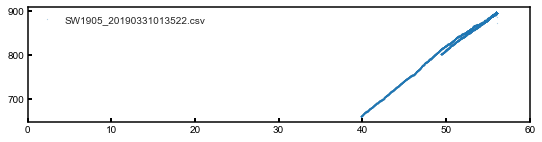

In [79]:
fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for unit, value in swdata.items():
    plt.plot(value.sza,value.sw,'.',markersize=.25,label=unit)
    
ax1.set_xlim([0,60])

plt.legend()


### Plot collocated SPN1's (2x)

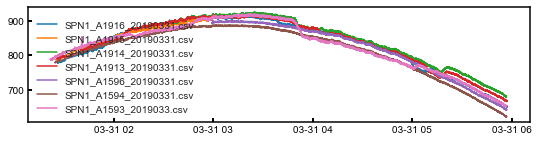

In [216]:
fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for unit, value in spn1.items():
    plt.plot(value.total,label=unit)

plt.legend()


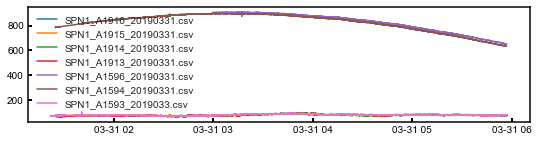

In [87]:
fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for unit, value in spn1.items():
    plt.plot(value.diffuse,label=unit)

plt.legend()


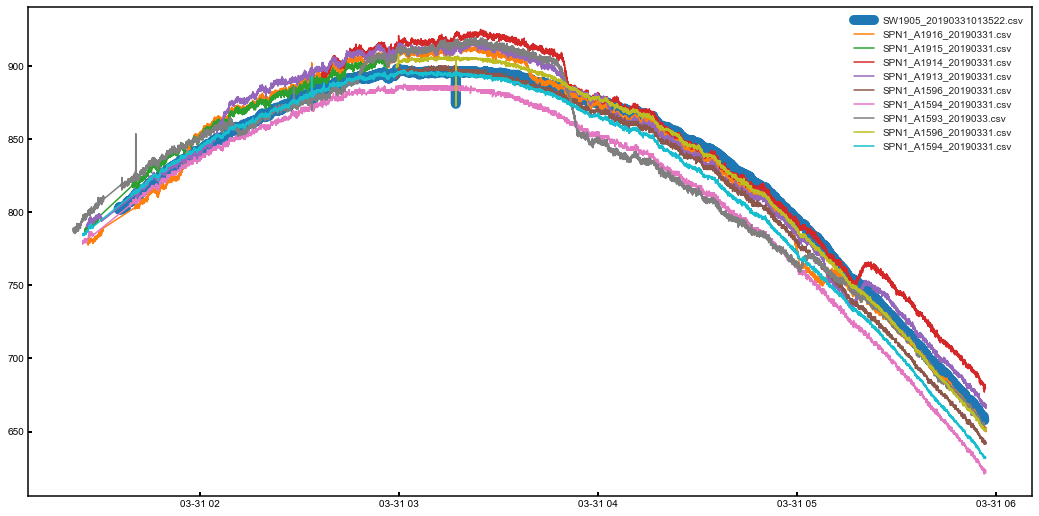

In [317]:
fig = plt.figure(1,figsize=(18,9))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for unit, value in swdata.items():
    plt.plot(value.index+datetime.timedelta(hours=0),value.sw,linewidth=10,label=unit)

for unit, value in spn1.items():
    plt.plot(value.total,label=unit)

for unit, value in spn1.items():
    if unit in ['SPN1_A1596_20190331.csv','SPN1_A1594_20190331.csv']:
        plt.plot(value.diffuse,label=unit)

plt.legend()
#ax1.set_xlim(['2019-03-31 3:30:00','2019-03-31 5:30:00'])

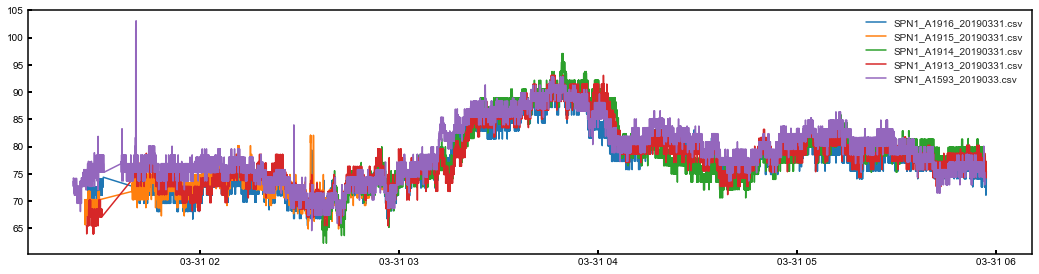

In [161]:
fig = plt.figure(1,figsize=(18,4.5))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for unit, value in spn1.items():
    if not unit in ['SPN1_A1596_20190331.csv','SPN1_A1594_20190331.csv']:
        plt.plot(value.diffuse,label=unit)



plt.legend()

#ax1.set_xlim(['2019-03-27 3:00:00','2019-03-27 4:00:00'])

### Plot percent error assuming PSP is truth (or near to it)

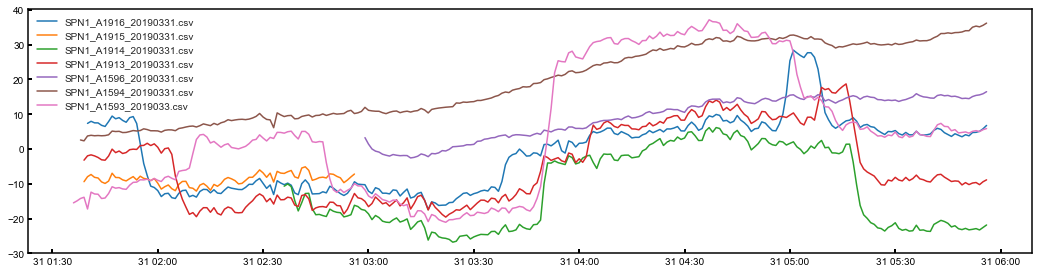

In [331]:
fig = plt.figure(1,figsize=(18,4.5))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for unit, value in spn1.items():

    stemp = swdata['SW1905_20190331013522.csv']
    if (stemp.index[0] < value.index[0]):
        temp = value[stemp.index[0]:value.index[-1]].total.resample('1T').mean()
        stemp = swdata['SW1905_20190331013522.csv'][value.index[0]:\
                                                    value.index[-1]].sw.resample('1T').mean()
    else:
        temp = value[value.index[0]:value.index[-1]].total.resample('1T').mean()
        stemp = swdata['SW1905_20190331013522.csv'][value.index[0]:\
                                                    value.index[-1]].sw.resample('1T').mean()
        
    plt.plot(stemp-temp,label=unit)
    
plt.legend()
    

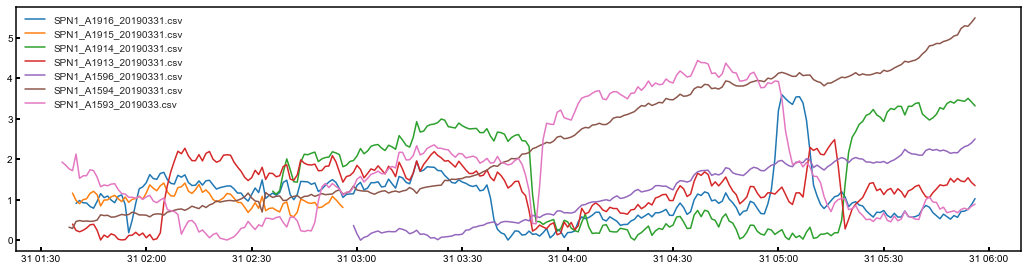

In [334]:
fig = plt.figure(1,figsize=(18,4.5))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for unit, value in spn1.items():

    stemp = swdata['SW1905_20190331013522.csv']
    if (stemp.index[0] < value.index[0]):
        temp = value[stemp.index[0]:value.index[-1]].total.resample('1T').mean()
        stemp = swdata['SW1905_20190331013522.csv'][value.index[0]:\
                                                    value.index[-1]].sw.resample('1T').mean()
    else:
        temp = value[value.index[0]:value.index[-1]].total.resample('1T').mean()
        stemp = swdata['SW1905_20190331013522.csv'][value.index[0]:\
                                                    value.index[-1]].sw.resample('1T').mean()
        
    plt.plot(np.abs(stemp-temp)/stemp * 100,label=unit)
    
plt.legend()
    